In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import math
import re
import cv2
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.visualization_helpers import *

In [2]:
PROPOSAL_ID = "1386"
STATE = "train"
injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections/*fc*.npy')
not_injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections/*[!fc]*.npy')
print(len(injected))

23862914


In [ ]:
#train_arrays = glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections//*fc*.npy')[25:50]

In [3]:
import torch
sample_count = 10e+3
flux_coef = torch.arange(sample_count) / sample_count # 0 - 1 normalized 10.000 samples
flux_coef = flux_coef * (10e-4 - 10e-10) + 10e-10
flux_coef = flux_coef.cpu().numpy()

In [5]:
len(flux_coef)

10000

In [9]:
main_dir = "/data/scratch/bariskurtkaya/dataset/NIRCAM/*"
main_total = 0

for pid_dir in glob.glob(main_dir):
    sub_dir = f"{pid_dir}/mastDownload/JWST/*psfstack*"
    total_psf = 0
    for psfs_dir in glob.glob(sub_dir):
        total_psf += fits.open(psfs_dir)[1].data.shape[0]
    if total_psf != 0:
        print(pid_dir.split('/')[-1], total_psf)

    main_total += total_psf

In [10]:
locations        = get_psf_info(train_arrays, '1386', 'train')
info             = get_augmentation_info(train_arrays)
transformed_list = do_transformations(info, locations)
arrays           = get_array(train_arrays)

Set OBSGEO-B to   -35.232067 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706579072.560 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Distance: 21.213203435596427
Distance: 15.620499351813308
Distance: 17.804493814764857
Distance: 21.213203435596427
Distance: 15.524174696260024
Distance: 25.079872407968907
Distance: 10.816653826391969
Distance: 25.079872407968907
Distance: 17.804493814764857
Distance: 21.213203435596427
Distance: 15.620499351813308
Distance: 25.079872407968907
Distance: 25.079872407968907
Distance: 17.804493814764857
Distance: 14.560219778561036
Distance: 21.213203435596427
Distance: 10.816653826391969
Distance: 25.079872407968907
Distance: 10.816653826391969
Distance: 6.0
Distance: 21.213203435596427
Distance: 18.439088914585774
Distance: 25.079872407968907
Distance: 15.620499351813308
Distance: 25.079872407968907


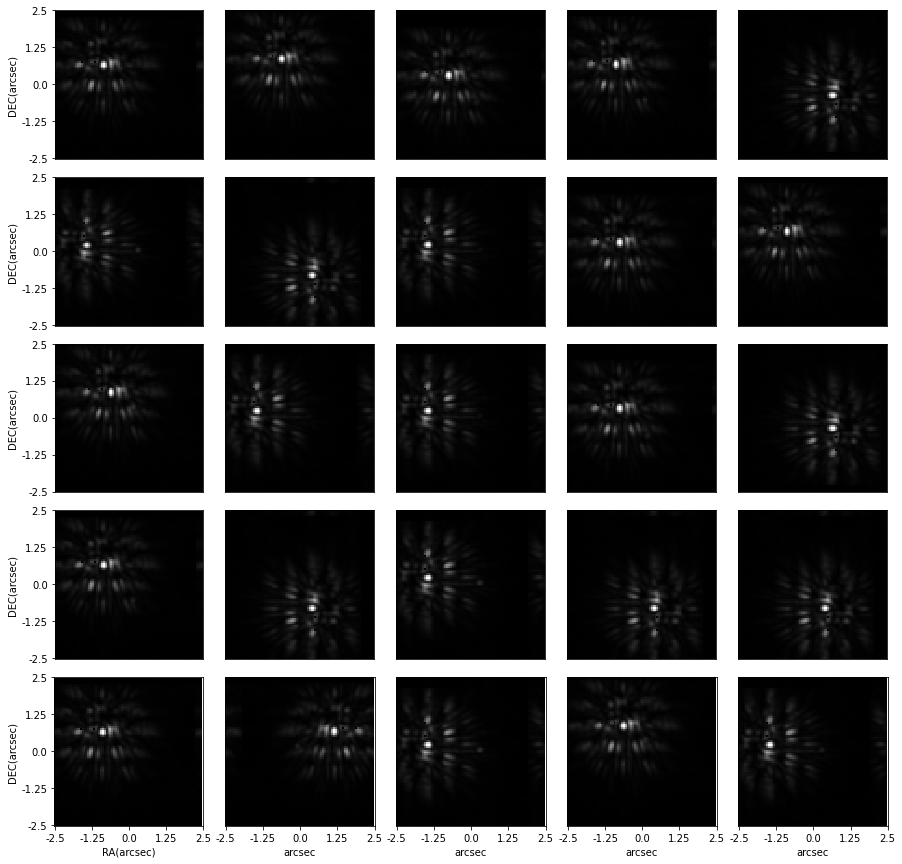

In [12]:
bs = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows,ncols=bs,figsize=(15,15))
distances = []
step = 20*0.06259530358142339
step = round(step,2)
labels = step*np.array([-2., -1., 0., 1., 2.])
axis_points = np.linspace(0,80,5)

for i, (row,col) in enumerate(product(range(nrows),range(bs))):

    idx_x  = train_arrays[i].rfind('x')

    if idx_x == -1:
        x, y = 0, 0
    else:
        x = int(train_arrays[i][idx_x+1:idx_x+3])
        y = int(train_arrays[i][idx_x+5:idx_x+7])

    #x, y = int(train_arrays[i].split('/')[-1].split('-')[-3:-1][0][1:]), int(train_arrays[i].split('/')[-1].split('-')[-3:-1][1][1:])
    axes[row][col].imshow(arrays[i], interpolation='nearest', cmap='Greys_r')

    if col == 0:
        axes[row][col].set_yticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_ylabel('DEC(arcsec)', fontsize=10)
        
        if row == 4:
            axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
            axes[row][col].set_xlabel('RA(arcsec)', fontsize=10)

        else:
            axes[row][col].set_xticks([])

    elif row == 4:
        axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_xlabel('arcsec', fontsize=10)
        axes[row][col].set_yticks([])

    else:
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])


    #axes[row][col].text(x, y, s="\u25CF", fontsize=12, color='red', alpha=.3, ha='center', va='center')#u"\u2734"
    axes[row][col].invert_yaxis()

    if int(transformed_list[i][0]) == -1:
        pass
    else:
        pass
        #axes[row][col].text(int(transformed_list[i][0]), int(transformed_list[i][1]) , s="\u2605", fontsize=30, color='green', ha='center', va='center')

    distance = calculate_distance(x1=x,x2=int(transformed_list[i][0]), y1=y,y2=int(transformed_list[i][1]))
    distances.append(distance)
    print("Distance:",distance)
    
plt.subplots_adjust(wspace=.12,hspace=.12)
#plt.savefig('figure.jpg',format='jpg', dpi=300, bbox_inches='tight', pad_inches=.1)
plt.show()